# NetworkX

### Importamos paqueterías

In [8]:
import pandas as pd
import networkx as nx

### Cargamos datos

Archivo csv con la matriz de vuelos de aeroméxico.

In [9]:
input_data = pd.read_csv('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv', index_col=0)

In [11]:
input_data.head()

,ACA,BJX,BOG,BRU,CCS,CDG,CJS,CLQ,CME,CUL,...,TAP,TGZ,TIJ,TPQ,TRC,UIO,VER,VSA,YUL,VVI
ACA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BJX,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
BOG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Red

Creamos la red de Aeroméxico a partir de la matriz de adyacencia.

In [10]:
G = nx.DiGraph(input_data.values)

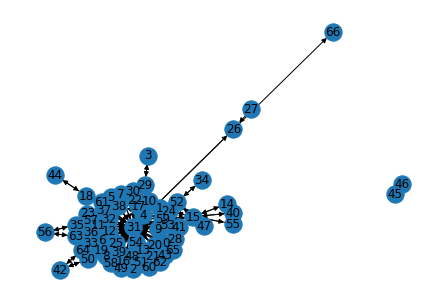

In [14]:
nx.draw(G, with_labels = True)